In [12]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from work.rap_machine_genius_code import read_pickle, write_pickle, Song

In [13]:
df = read_pickle('data/song_df.pkl')

There are 30 songs in the top 1000 rap songs that are tagged with 'broadway'--these are all Hamilton songs, most likely!

In [14]:
len(df[df['broadway'] == 1])

30

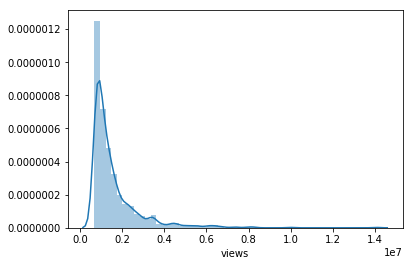

In [15]:
sns_plot = sns.distplot(df['views'])
fig = sns_plot.get_figure()
fig.savefig('img/hist.svg')

Only 83 songs in the top 1000 register a zero on my "curse" feature.

In [16]:
curse_mask = df['curse'] == 0
len(df[curse_mask])

83

In [17]:
lim_df = df.copy()

# Define the model
lm1 = smf.ols('views ~ cars + clothes + religion + curse + verified + contrib', data=lim_df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     108.8
Date:                Thu, 11 Jul 2019   Prob (F-statistic):          9.26e-105
Time:                        11:24:51   Log-Likelihood:                -14792.
No. Observations:                 974   AIC:                         2.960e+04
Df Residuals:                     967   BIC:                         2.963e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.104e+05   6.84e+04      4.541      0.000    1.76e+05    4.45e+05
cars         3.25e+07   1.73e+07      1.883      0.060   -1.37e+06    6.64e+07
clothes      3.89e+06   4.23e+06      0.919      0.358   -4.41e+06    1.22e+07
religion   -5.769e+06   4.84e+06     -1.191      0.234   -1.53e+07    3.73e+06
curse       2.828e+05   1.42e+06      0.200      0.842    -2.5e+06    3.06e+06
verified    1.336e+05   6.46e+04      2.068      0.039    6805.051     2.6e+05
contrib     6527.1805    262.754     24.841      0.000    6011.547    7042.814
==============================================================================
Omnibus:                      330.087   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.129
Skew:                           1.543   Prob(JB):                    6.23e-307
Kurtosis:                       8.022   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = df[['contrib', 'verified', 'cars', 'clothes', 'curse', 'religion']]
y = df['views']
std = StandardScaler()
std.fit(X.values)
X_tr = std.transform(X.values)

ridge_model = RidgeCV()
ridge_model.fit(X_tr, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

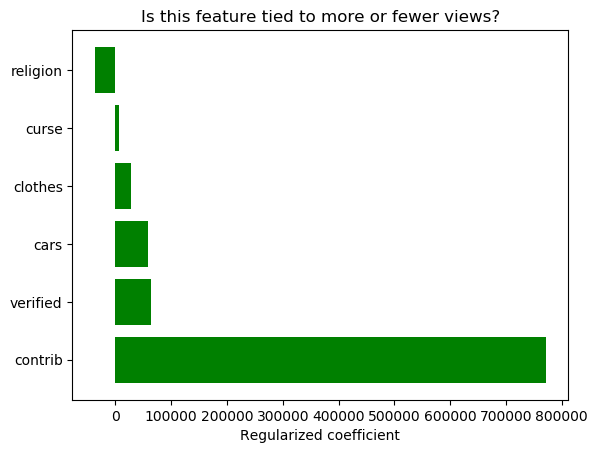

In [19]:
scores = sorted(list(zip(X.columns, ridge_model.coef_)), key = lambda x: x[1])
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features, performance = zip(*scores)
y_pos = np.arange(len(features))

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Regularized coefficient')
ax.set_title('Is this feature tied to more or fewer views?')

plt.show()
fig.savefig('img/features.svg')

In [215]:
X = df[['cars', 'clothes', 'curse', 'religion']]
y = df['views']

std = StandardScaler()
std.fit(X.values)
X_tr = std.transform(X.values)

ridge_model = RidgeCV()
ridge_model.fit(X_tr, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

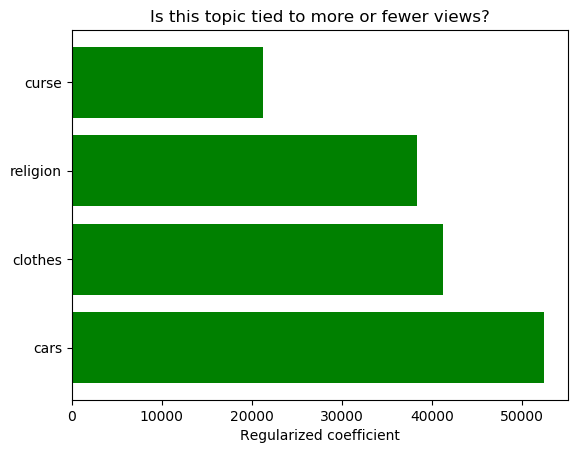

In [216]:
scores = sorted(list(zip(X.columns, ridge_model.coef_)), key = lambda x: x[1])
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features, performance = zip(*scores)
y_pos = np.arange(len(features))

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Regularized coefficient')
ax.set_title('Is this topic tied to more or fewer views?')

plt.show()
fig.savefig('topics.svg')

In [217]:
lim_df = df.copy()

X = lim_df[['cars', 'clothes', 'curse', 'religion']]
y = lim_df['views']

# Define the model
lm2 = smf.ols('views ~ cars + clothes + curse + religion', data=lim_df)

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.071
Date:                Tue, 09 Jul 2019   Prob (F-statistic):              0.370
Time:                        16:25:14   Log-Likelihood:                -15041.
No. Observations:                 974   AIC:                         3.009e+04
Df Residuals:                     969   BIC:                         3.012e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.525e+06   6.08e+04     25.070      0.000    1.41e+06    1.64e+06
cars        2.975e+07   2.22e+07      1.339      0.181   -1.39e+07    7.34e+07
clothes     5.725e+06   5.46e+06      1.049      0.294   -4.98e+06    1.64e+07
curse       9.887e+05   1.83e+06      0.541      0.589    -2.6e+06    4.57e+06
religion    6.077e+06   6.22e+06      0.977      0.329   -6.13e+06    1.83e+07
==============================================================================
Omnibus:                      740.903   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14608.022
Skew:                           3.345   Prob(JB):                         0.00
Kurtosis:                      20.754   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
X = df[['gucci', 'fendi', 'prada', 'vuitton', 'dior', 'chanel',
        'balenciaga', 'louboutin', 'givenchy', 'versace']]
y = df['views']

selected_columns = ['gucci', 'fendi', 'prada', 'vuitton', 'dior',
                    'chanel', 'balenciaga', 'louboutin', 'givenchy', 'versace']

# X_train_val, X_test, y_train_val, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=.25, random_state=43)
std = StandardScaler()
std.fit(X.values)

X_tr = std.transform(X.values)

ridge_model = RidgeCV()
ridge_model.fit(X_tr, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

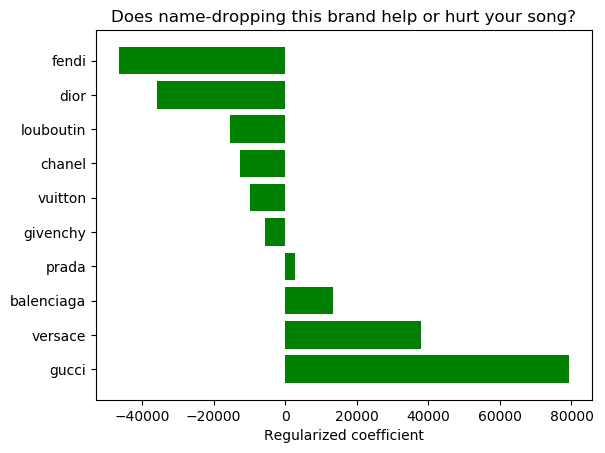

In [219]:
scores = sorted(list(zip(X.columns, ridge_model.coef_)), key = lambda x: x[1])
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
brands, performance = zip(*scores)
y_pos = np.arange(len(brands))

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(brands)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Regularized coefficient')
ax.set_title('Does name-dropping this brand help or hurt your song?')

plt.show()
fig.savefig('clothes_brands.svg')

In [220]:
lim_df = pd.DataFrame(X_tr, columns = ['gucci', 'fendi', 'prada', 'vuitton', 'dior', 'chanel',
        'balenciaga', 'louboutin', 'givenchy', 'versace'])
lim_df['views'] = y.reset_index(drop = True)

# Define the model
lm3 = smf.ols(
    'views ~ gucci + fendi + prada + vuitton + dior + chanel + balenciaga + louboutin + givenchy + versace', data=lim_df)

# Fit the model
fit3 = lm3.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6519
Date:                Tue, 09 Jul 2019   Prob (F-statistic):              0.770
Time:                        16:25:16   Log-Likelihood:                -15040.
No. Observations:                 974   AIC:                         3.010e+04
Df Residuals:                     963   BIC:                         3.016e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.584e+06   3.96e+04     39.950      0.000    1.51e+06    1.66e+06
gucci       8.038e+04   4.13e+04      1.944      0.052    -761.355    1.62e+05
fendi       -4.94e+04    9.6e+04     -0.515      0.607   -2.38e+05    1.39e+05
prada       4740.1596   9.61e+04      0.049      0.961   -1.84e+05    1.93e+05
vuitton    -9391.4218   8.49e+04     -0.111      0.912   -1.76e+05    1.57e+05
dior       -3.622e+04   3.98e+04     -0.909      0.363   -1.14e+05    4.19e+04
chanel     -1.286e+04   4.27e+04     -0.301      0.764   -9.67e+04     7.1e+04
balenciaga  1.341e+04   3.99e+04      0.336      0.737   -6.48e+04    9.17e+04
louboutin   -1.56e+04   3.97e+04     -0.394      0.694   -9.34e+04    6.22e+04
givenchy   -5595.0757   3.97e+04     -0.141      0.888   -8.35e+04    7.23e+04
versace     3.845e+04   3.97e+04      0.968      0.333   -3.95e+04    1.16e+05
==============================================================================
Omnibus:                      745.512   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14875.366
Skew:                           3.371   Prob(JB):                         0.00
Kurtosis:                      20.919   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No scaling because tags are binary, either the tag is present or not.

In [221]:
X = df[['country','pop','trap','rnb','broadway']]
y = df['views']

ridge_model = RidgeCV()
ridge_model.fit(X, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

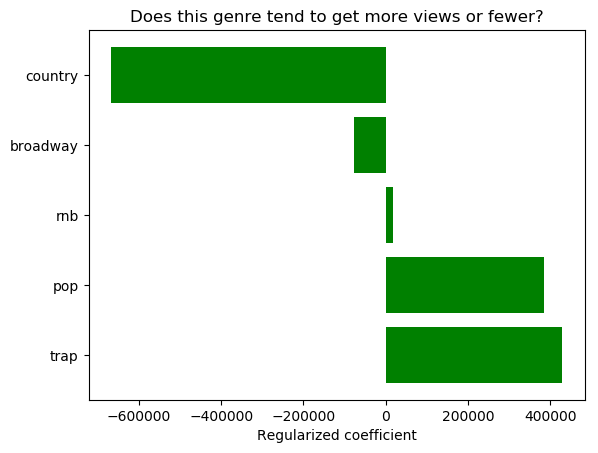

In [222]:
scores = sorted(list(zip(X_train.columns, ridge_model.coef_)), key = lambda x: x[1])
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
genres, performance = zip(*scores)
y_pos = np.arange(len(genres))

ax.barh(y_pos, performance, align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Regularized coefficient')
ax.set_title('Does this genre tend to get more views or fewer?')

plt.show()
fig.savefig('genres.svg')

In [223]:
lim_df = pd.DataFrame(X, columns = ['country', 'rnb', 'broadway', 'pop', 'trap'])
lim_df['views'] = y.reset_index(drop = True)

In [224]:
# Define the model
lm1 = smf.ols('views ~ country + rnb + broadway + pop + trap', data=lim_df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     6.707
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           3.75e-06
Time:                        16:25:17   Log-Likelihood:                -14679.
No. Observations:                 951   AIC:                         2.937e+04
Df Residuals:                     945   BIC:                         2.940e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.426e+06   5.41e+04     26.375      0.000    1.32e+06    1.53e+06
country      -9.2e+05   7.11e+05     -1.294      0.196   -2.32e+06    4.75e+05
rnb         7868.5570   1.09e+05      0.072      0.943   -2.07e+05    2.23e+05
broadway   -4.005e+04   2.37e+05     -0.169      0.866   -5.06e+05    4.26e+05
pop           3.7e+05   1.15e+05      3.224      0.001    1.45e+05    5.95e+05
trap        4.411e+05   9.09e+04      4.852      0.000    2.63e+05    6.19e+05
==============================================================================
Omnibus:                      712.567   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14384.275
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      20.908   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""